In [8]:
import pandas as pd

from alphax.dataset import DATASET_DIR

train_data = pd.read_csv(f"{DATASET_DIR}/candle/5m/DOGE_USDT:USDT_2024-01-01 00:00:00_2024-07-01 00:00:00.csv")

# 删除不需要的列
train_data.drop(columns=["high", "low", "open","volume"], inplace=True)
train_data.head()

,timestamp,close
0,2023-12-31 16:00:00,0.09018
1,2023-12-31 16:05:00,0.09023
2,2023-12-31 16:10:00,0.09044
3,2023-12-31 16:15:00,0.09043
4,2023-12-31 16:20:00,0.09046


In [14]:
# 构建涨幅率，涨幅率 = (后一行的close - 当前一行close) / 当前一行的close
train_data['price_rate'] =  (train_data["close"].shift(-1) - train_data["close"]) / train_data["close"]
train_data['target'] = train_data['price_rate'] > 0.002
# 统计一下target为true的数量
train_data['target'].value_counts()


target
False    43529
True      8971
Name: count, dtype: int64

In [16]:
from talib import MACD

macd, macd_signal, macd_hist = MACD(train_data['close'], fastperiod=12, slowperiod=26, signalperiod=9)
train_data['macd_hist'] = macd_hist * 100000
train_data.dropna(inplace=True)

In [49]:
from alphax.core.utils.math_util import MathUtil

# 计算斜率
window = 4
# 根据window的大小，构建一个x轴的坐标
x = list(range(window))

train_data['macd_hist_slope'] = train_data['macd_hist'].rolling(window=window).apply(lambda y:MathUtil.slope(x,y), raw=True)

train_data.head()


,timestamp,close,price_rate,target,macd_hist,macd_hist_slope
61,2023-12-31 21:05:00,0.08997,0.000556,False,-1.126445,1.604674
62,2023-12-31 21:10:00,0.09002,0.002666,True,1.017354,2.129058
63,2023-12-31 21:15:00,0.09026,-0.000332,False,3.989485,2.521293
64,2023-12-31 21:20:00,0.09023,-0.000997,False,5.592824,2.312994
65,2023-12-31 21:25:00,0.09014,0.000444,False,5.858528,1.612686


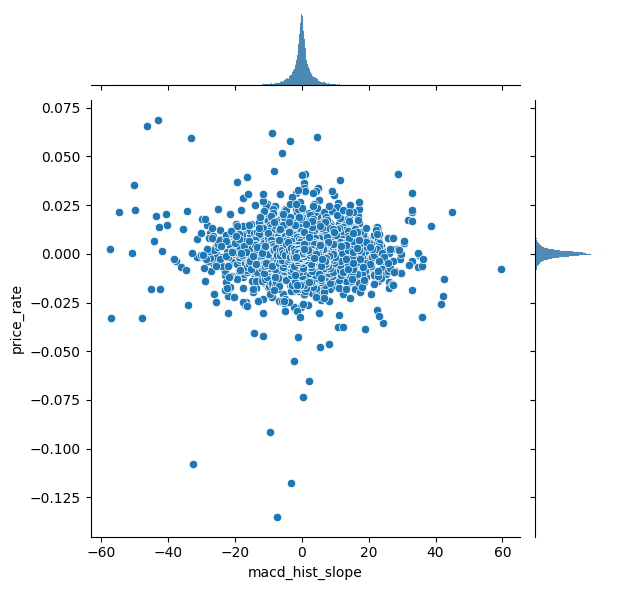

In [50]:
# 用plot 展示一下 price_diff_rate 在 macd_hist_slope 下的分布
import matplotlib.pyplot as plt
import seaborn as sns
# filtered_df = train_data[train_data['macd_hist_slope'] ]
filtered_df = train_data
sns.jointplot(x='macd_hist_slope', y='price_rate', data=filtered_df, kind='scatter')
plt.show()
